

# Project: Investigation of dataset medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For exploration of the a dataset. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. We will use this data to find factors that could be used to determine if a patient will likely be a no-show for their appointment.




In [39]:
#Here I import numpy, pandas, matplotlib and seaborn, I used %matplotlib inline to view the visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [40]:
# Load in CSV File to dataframe
df_NoShow = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#show first 5 rows of the dataframe
df_NoShow.head(5)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [41]:
df_NoShow.shape

(110527, 14)

There are 110527 rows and 14 columns in the dataset

In [42]:
df_NoShow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There appears to be no missing data in any of the rows. This is a very clean dataset

In [43]:
#showing descriptive statistics of the datarame
df_NoShow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There is a negative value in the age column. This will need to be fixed.

Text(0.5,1,'No Show')

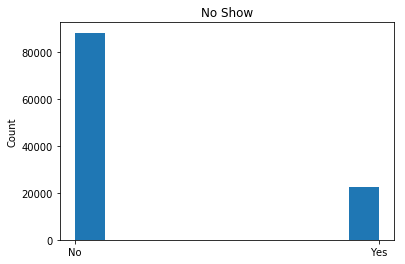

In [44]:
#Histogram of the no-show column to get an estimate of the proportion of appointments that were no-shows
plt.hist(x= df_NoShow["No-show"],)
plt.ylabel("Count")
plt.title("No Show")

 

### Data Cleaning 

>I am going to remove the negative age value from the dataframe as it is only one row. Then I am going to encode the no-show column. Then I will get the proportion of medical appoints that were no-shows in the dataset. Then I will remove columns that are not useful.

In [45]:
#determine how many ages are negative in the data frame
df_NoShow[df_NoShow.Age < 0]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is only one row in the dataframe that has a negative value, I will remove it from the dataframe

In [46]:
#droping row with negative age value and checking dataframe to confirm
df_NoShow.drop(index=99832, inplace=True)
df_NoShow[df_NoShow.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [47]:
# I replaced the 'No' and 'Yes' valued in the No-show column to 0 and 1 respectively
df_NoShow["No-show"].replace(to_replace=['No', 'Yes'], value=[0, 1], inplace = True)

In [48]:
#I rename the "No-Show" to "noshow"
df_NoShow.rename(columns={"No-show":"noshow"}, inplace = True)

In [49]:
#Calculate the percentage of appointments in dataset that were No-shows
df_NoShow[df_NoShow["noshow"]== 1].noshow.count()/df_NoShow.noshow.count()*100

20.193438647919944

20% of the appointments are no-shows

In [50]:
#Drop patientID, AppointmentID, ScheduleDay, AppointmentDay, and Neighbourhood columns
df_NoShow.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay","Neighbourhood"], axis=1, inplace=True)

In [51]:
#Show the first 5 rows of the dataframe to verify the columns were dropped
df_NoShow.head(5)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,noshow
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0


The dataset is ready for analysis

In [52]:

# here I created masks that can use later during the analysis
NoShow = df_NoShow["noshow"]== 1
Show = df_NoShow["noshow"] ==0
Texted = df_NoShow["SMS_received"]== 1
NoText = df_NoShow["SMS_received"] ==0

<a id='eda'></a>
## Exploratory Data Analysis





### Question 1: Does Age Affect Likelyhood of No-Show Status?

In [53]:
# Mean age of no shows in the dataset
MeanAgeNoshow = df_NoShow.Age[NoShow].mean()
print(MeanAgeNoshow)


34.3176665621


The average age for no-show patients is 34 years old

In [54]:
#calculate mean age patients who showed up for appointment
MeanAgeShow = df_NoShow.Age[Show].mean()
print(MeanAgeShow)

37.790504155


The average age for patients who showed up to their appointments is 17 years old

In [55]:
#calculate mean age of dataset
MeanAge = df_NoShow.Age.mean()
print(MeanAge)

37.0892188263


The average age of the patients in the dataset is 37 years old

In [56]:
#calculate the standard deviation age in the dataset
StdAge = df_NoShow.Age.std()
print(StdAge)

23.1100255185


The standard deviation of the age of patients in the dataset is 23 years

Text(0.5,1,'Mean Ages')

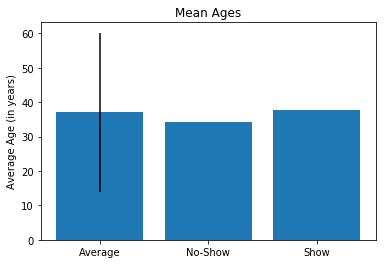

In [57]:
#Bar plot visualizing the data, including error bars for standard deviation
plt.bar(x= ["No-Show", "Show", "Average"], height=[MeanAgeNoshow,MeanAgeShow, MeanAge], yerr = [0,0,StdAge])
plt.ylabel("Average Age (in years)")
plt.title("Mean Ages")



While the average age of patients who were no-shows is slightly lower than average age of patients who made their appointments and the average age of the whole dataset the difference is minor (34 vs. 37 years old). The difference between the two are minor when compared to the standard deviation of the whole data set (23 years). The standard deviation is a measure of variance within the dataset. Had the mean of no-shows been further away from the mean of the whole dataset we may have been able to make the conclusion that age is a factor in determining if a patient will be a no-show.

### Question 2: Does receiving a Text Message decrease likelyhood of being a No-Show?

In [58]:
# Calculate the percentage of no-shows of texted patients vs. not texted patients
TextedNoshow = (df_NoShow[df_NoShow["SMS_received"]== 1].noshow[NoShow].count()/df_NoShow[df_NoShow["SMS_received"]== 1].noshow.count())*100
NotTextedNoShow = (df_NoShow[df_NoShow["SMS_received"]== 0].noshow[NoShow].count()/df_NoShow[df_NoShow["SMS_received"]== 0].noshow.count())*100
print("Percent texted that did not show up:")
print(TextedNoshow)
print("Percent not texted that did not show up:")
print(NotTextedNoShow)

Percent texted that did not show up:
27.5745448396
Percent not texted that did not show up:
16.7035339268


Text(0.5,1,'Texted vs. Not Texted')

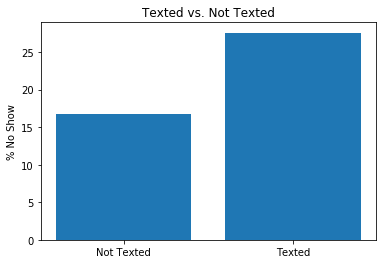

In [59]:
#bar plot to visualize the difference
plt.bar(x= ["Texted", "Not Texted"], height=[TextedNoshow, NotTextedNoShow])
plt.ylabel("% No Show")
plt.title("Texted vs. Not Texted")

There appears to be a large increase in the the amount of texted patients who were no-shows when compared to patients who were not texted (27% vs 16%). It would appear that texting the patients does increase the likelyhood that the patient is a no show. However the causality is unclear, does texting patients really increase their chances of being a no-show? Or is there something else going on here?

### Question 3: Does type of medical issue or having a scholarship affect likelyhood of Being a No-Show

In [60]:
#caluclate the percentage no-shows for all medical issues and scholarship 
AlcoholismNoshow = (df_NoShow[df_NoShow["Alcoholism"]==1].noshow[NoShow].count()/df_NoShow[df_NoShow["Alcoholism"]==1].noshow.count())*100
HipertensionNoshow = (df_NoShow[df_NoShow["Hipertension"]==1].noshow[NoShow].count()/df_NoShow[df_NoShow["Hipertension"]==1].noshow.count())*100
DiabetesNoshow = (df_NoShow[df_NoShow["Diabetes"]==1].noshow[NoShow].count()/df_NoShow[df_NoShow["Diabetes"]==1].noshow.count())*100
HandicapNoshow = (df_NoShow[df_NoShow["Handcap"]>=1].noshow[NoShow].count()/df_NoShow[df_NoShow["Handcap"]>=1].noshow.count())*100
ScholarshipNoshow = (df_NoShow[df_NoShow["Scholarship"]==1].noshow[NoShow].count()/df_NoShow[df_NoShow["Scholarship"]==1].noshow.count())*100

In [61]:
#print statement to give percentages
print("Percent with Alcholism that did not show up:")
print(AlcoholismNoshow)
print("Percent with hipertension that did not show up:")
print(HipertensionNoshow)
print("Percent with Diabetes that did not show up:")
print(DiabetesNoshow)
print("Percent with Handicap that did not show up:")
print(HandicapNoshow)
print("Percent with scholarship that did not show up:")
print(ScholarshipNoshow)

Percent with Alcholism that did not show up:
20.1488095238
Percent with hipertension that did not show up:
17.3019586258
Percent with Diabetes that did not show up:
18.0032733224
Percent with Handicap that did not show up:
18.161535029
Percent with scholarship that did not show up:
23.7363042077


Text(0.5,1,'Medical Issues vs. Scholarships')

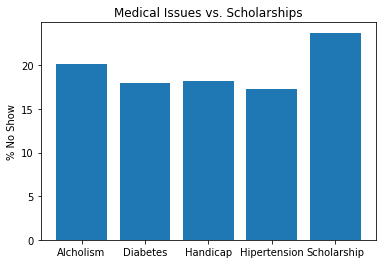

In [62]:
#bar plot to visualize the percentages
plt.bar(x= ["Alcholism", "Hipertension", "Diabetes", "Handicap", "Scholarship"], height=[AlcoholismNoshow, HipertensionNoshow, DiabetesNoshow, HandicapNoshow, ScholarshipNoshow])
plt.ylabel("% No Show")
plt.title("Medical Issues vs. Scholarships")

It would appear the having a scholarship gives the patient the highest chance of missing the appointment 23% which is higher than the overall no-show percentage of 20% for the the whole dataset. This may be because there is no financial incentive to make these appointments. Alcoholism is at 20%, right in line with the overall dataset. Diabetes, hipertension and handicaps are at 18%, 17% and 18% slightly below the overall no-show percentage of the data set. 

<a id='conclusions'></a>
## Conclusions

Through exploring this dataset I found some interesting information. I found that age does not appear to be factor in determining if a patient will be a no show. We found that if a person was texted they were more likely to miss their appointment (27% vs 16%). The causality behind this is still unclear as it is unknown why reminding someone they have appointment would make them more likely to miss their appointment. I also found that if the patient has a scholarship it is more likely that they were a no-show (23% vs 20%). It may be because there is no monetary incentive to make the appointment but I cannot say for certain. I also found that a person having alcoholism does not change the chance that the patient was a no-show and that if a patient had diabetes, hipertension or a handicap they were less likely be a no-show.



## Limitations/ Future Questions: 

Some clarification could be used to determine patients texted were texted in lieu of being called. They may account for why they were more likely to be no-shows. 



In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0